Questions to answer: 
3. There is a relationship between priority and profit ?!

8. What is the number of orders depends on it's priority and it's profit ?!

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install and import geopandas library (I'd like to create some map plots) + Download U.S. State shapefile 
# From https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html


# pip install geopandas
import geopandas as gpd

## Preparing Superstore dataset

In [3]:
# import data (.csv file)
storedf = pd.read_csv(r'/Users/pims/Desktop/projects/superstore/SuperStoreUS.csv')
storedf.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12/05/2015,14/05/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12/05/2015,13/05/2015,-24.0300,7,22.23,86838


In [4]:
# Get to know the data
storedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                1952 non-null   int64  
 1   Order Priority        1952 non-null   object 
 2   Discount              1952 non-null   float64
 3   Unit Price            1952 non-null   float64
 4   Shipping Cost         1952 non-null   float64
 5   Customer ID           1952 non-null   int64  
 6   Customer Name         1952 non-null   object 
 7   Ship Mode             1952 non-null   object 
 8   Customer Segment      1952 non-null   object 
 9   Product Category      1952 non-null   object 
 10  Product Sub-Category  1952 non-null   object 
 11  Product Container     1952 non-null   object 
 12  Product Name          1952 non-null   object 
 13  Product Base Margin   1936 non-null   float64
 14  Country               1952 non-null   object 
 15  Region               

- There is no null value in the dataset
- Order date & Ship date are strings

In [5]:
# Replace space in headers with _
newheaders = []
for h in storedf.columns:
    h = h.replace(' ','_')
    newheaders.append(h)

In [6]:
storedf.columns = newheaders
storedf.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,Region,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07/01/2015,08/01/2015,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,13/06/2015,15/06/2015,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,15/02/2015,17/02/2015,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,12/05/2015,14/05/2015,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,12/05/2015,13/05/2015,-24.0300,7,22.23,86838


In [7]:
# Convert Order_Date & Ship_Date into date in terms of their types
storedf['Order_Date'] = pd.to_datetime(storedf['Order_Date'],format='%d/%m/%Y')
storedf['Ship_Date'] = pd.to_datetime(storedf['Ship_Date'],format='%d/%m/%Y')
storedf.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,Region,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [8]:
storedf.Order_Priority.unique()

array(['High', 'Not Specified', 'Critical', 'Medium', 'Low', 'Critical '],
      dtype=object)

There are 2 of Criticals (with and without trailing space), I'll get rid of the trailing space

In [9]:
storedf['Order_Priority'] = storedf['Order_Priority'].str.strip()

## Peparing U.S. State shapefile

In [10]:
states = gpd.read_file('/Users/pims/Desktop/projects/superstore/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
states.head()               

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [11]:
# Get to know the coordinate reference system (crs)
states.crs 

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

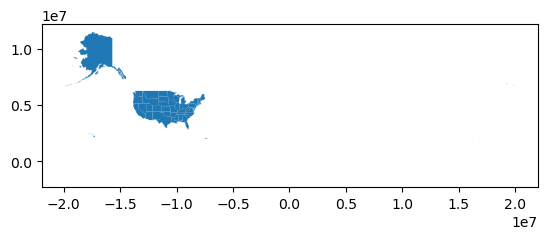

In [12]:
# Make the map look more familiar (like ggmaps)
states = states.to_crs('EPSG:3395')
states.plot()

There are some non-continental states in the map above.

In [13]:
# Remove non-continental us states except Rhode Island because storedf has got this state
states = states[~states['NAME'].isin(['Alaska', 'Hawaii', 
                                    'Puerto Rico',
                                    'United States Virgin Islands',
                                    'Commonwealth of the Northern Mariana Islands',
                                   'American Samoa',
                                   'Guam'])].reset_index()

<AxesSubplot:>

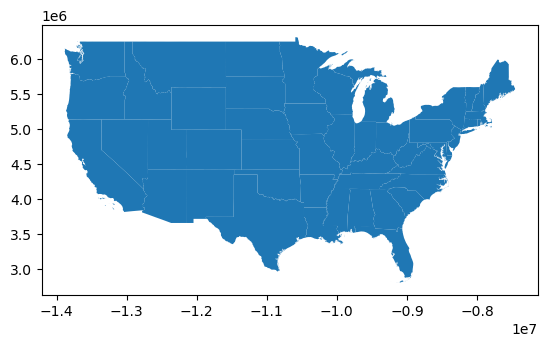

In [19]:
states.plot()

In [15]:
# Check if there are unmatched state names
statesname0 = states.NAME.unique().tolist()
statesname1 = storedf.State_or_Province.unique().tolist()

In [17]:
for i in statesname1:
    if i not in statesname0:
        print(i)

100% Same name

## 1. What is the distribution of days the order takes depends on it's priority ?

In [21]:
# Create the new column which is the difference between order date and ship date
storedf1 = storedf.copy()
storedf1['Diff_Days'] = (storedf1['Ship_Date'] - storedf1['Order_Date']) / np.timedelta64(1, 'D')
storedf1.head()

,Row_ID,Order_Priority,Discount,Unit_Price,Shipping_Cost,Customer_ID,Customer_Name,Ship_Mode,Customer_Segment,Product_Category,...,State_or_Province,City,Postal_Code,Order_Date,Ship_Date,Profit,Quantity_ordered_new,Sales,Order_ID,Diff_Days
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,1.0
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,2.0
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,2.0
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,2.0
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838,1.0


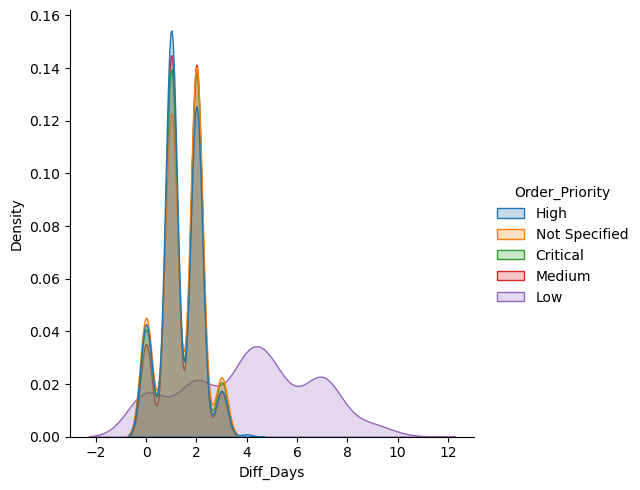

In [85]:
sns.displot(storedf1, x='Diff_Days',hue='Order_Priority' ,kind='kde', fill=True)

From the chart above, 
- The number of days change depend on the order's priority.
- The most common number of shipping days in High,Medium, Critical and Not Specified priority are almost the same, is approximately 1-2 days.
- Number of shipping days in low priority are varies and have more days in shipping. 

## 2. What is the most effective delivery way ?

In [52]:
storedf.groupby('Ship_Mode')['Row_ID'].count()

Ship_Mode
Delivery Truck     275
Express Air        240
Regular Air       1437
Name: Row_ID, dtype: int64

Regular air is the most popular shipping method.

<AxesSubplot:xlabel='Ship_Mode', ylabel='count'>

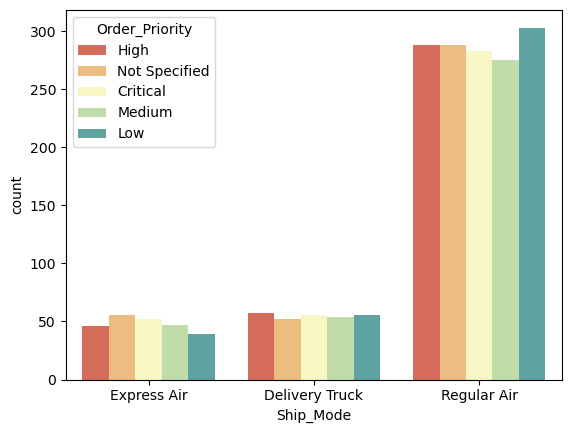

In [89]:
sns.countplot(data = storedf, x = 'Ship_Mode', hue = 'Order_Priority',palette='Spectral')

From the chart above, regular air is the most popular shipping method in every order priority.

In [92]:
storedf1.groupby('Ship_Mode')['Diff_Days'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship_Mode,,,,,,,,
Delivery Truck,275.0,1.894545,1.625461,0.0,1.0,2.0,2.0,9.0
Express Air,240.0,1.800000,1.420708,0.0,1.0,2.0,2.0,8.0
Regular Air,1437.0,1.972860,1.764700,0.0,1.0,2.0,2.0,10.0


The nummber of Shipping days are almost equal in every method.

## 3.There is a relationship between priority and profit ?

In [103]:
storedf.groupby('Order_Priority')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Order_Priority,,,,,,,,
Critical,391.0,97.968640,1145.592989,-13706.464000,-71.98100,2.70600,158.271650,4899.1288
High,391.0,93.351742,852.304277,-3061.820000,-96.16000,-1.07120,103.551150,7402.3200
Low,398.0,88.982043,1209.750777,-14140.701600,-91.86700,6.56283,115.733475,8798.1831
Medium,376.0,115.346069,1428.434330,-16476.838000,-77.22843,3.12850,112.977000,7024.2069
Not Specified,396.0,177.995878,1002.567399,-5390.738892,-85.46160,-4.38050,116.732925,9228.2256


<AxesSubplot:xlabel='Order_Priority', ylabel='Profit'>

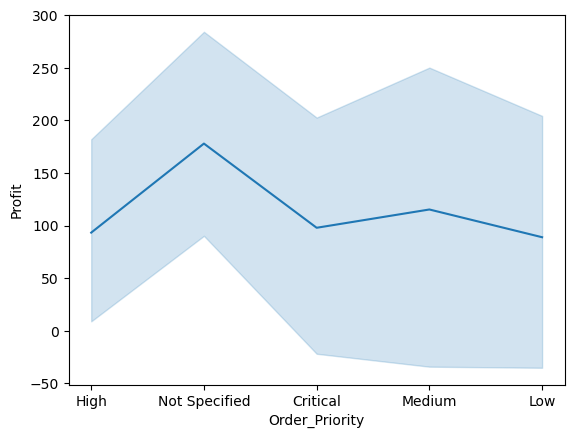

In [116]:
sns.lineplot(data=storedf, x='Order_Priority', y='Profit')
# The mean and 95% confidence interval

- The mean number of Not Specified priority is higher in profit, The rests are almost the same.
- We can find lost orders in every kind of order priority.

## 4. Which category sells more and in which state ?

In [ ]:
storedf.groupby('Product_Category')['Row_ID'].count().reset_index()

From the table above, Office Supplies are most sold

In [ ]:
storedf4 = storedf[storedf['Product_Category'] == 'Office Supplies']
techbystate = storedf4.groupby('State_or_Province')['Row_ID'].count().reset_index()
techbystate.head()

In [ ]:
plot4 = pd.merge(left=techbystate,right=states,left_on='State_or_Province',
                right_on='NAME',how='left')
gplot4 = gpd.GeoDataFrame(plot4)

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
ax.set_title('Office Supplies sold by States',size=30,weight='bold')
gplot4.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], 
                                   ha='center', fontsize=14),axis=1)
gplot4.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot4.plot(ax=ax, column='Row_ID',legend=True,cmap='coolwarm'
                ,legend_kwds={'shrink':0.5})

plt.show()

The map above shows the number of office supplies are sold by states

## 5. What is the number of order in each region and it's profit ?
- 

In [ ]:
countbyreg = storedf.groupby('Region')['Row_ID'].count().reset_index()
countbyreg

In [ ]:
# Add Region column into States dataframe
regiondf = storedf[['Region','State_or_Province']].drop_duplicates(keep='first').reset_index(drop=True)
StateswRegion = pd.merge(left=regiondf, right=states,
                        left_on='State_or_Province',right_on='NAME',
                        how='left')
StateswRegion.head()

In [ ]:
StateswRegion.Region.unique() # There are 4 regions

In [ ]:
# Merge 2 dataframes
plot5 = pd.merge(left=StateswRegion, right=countbyreg,
                        left_on='Region',right_on='Region',
                        how='left')

In [ ]:
gplot5 = gpd.GeoDataFrame(plot5)

In [ ]:
# Aggregate geomatric feature (group by region)
gplot5diss = gplot5.dissolve(by='Region',aggfunc='mean')

In [ ]:
import math
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
ax.set_title('The number of orders by Region',size=30,weight='bold')
gplot5diss.apply(lambda x: ax.annotate(text= str(math.floor(x.Row_ID))
                                       ,xy=x.geometry.centroid.coords[0], 
                                        ha='center', fontsize=25),axis=1)
gplot5diss.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot5diss.plot(ax=ax, column='Row_ID',cmap='Pastel2')

plt.show()

In [ ]:
profbyreg = storedf.groupby('Region')['Profit'].mean().reset_index()
profbyreg

In [ ]:
plot5extra = pd.merge(left=StateswRegion, right=profbyreg,
                        left_on='Region',right_on='Region',
                        how='left')

In [ ]:
gplot5extra = gpd.GeoDataFrame(plot5extra)

In [ ]:
gplot5extradiss = gplot5extra.dissolve(by='Region',aggfunc='mean')

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
ax.set_title('Profit by Region',size=30,weight='bold')
gplot5extradiss.apply(lambda x: ax.annotate(text= str(round(x.Profit,2))
                                       ,xy=x.geometry.centroid.coords[0], 
                                        ha='center', fontsize=20),axis=1)
gplot5extradiss.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot5extradiss.plot(ax=ax, column='Profit',legend=True,cmap='coolwarm'
                ,legend_kwds={'shrink':0.5})

plt.show()

## 6. In which month we have best sales ?
- Extract month from Order Date
- Sum sales of each month

In [ ]:
storedf6 = storedf.copy()
storedf6['Order_M'] = pd.DatetimeIndex(storedf6['Order_Date']).month

In [ ]:
monthmostsales = storedf6.groupby('Order_M')['Sales'].sum().reset_index()
monthmostsales = monthmostsales.sort_values(by='Sales',ascending=False)
monthmostsales

From the table above, 4th month (April) has best sales

## 7. In which month we have least sales ?
- Extract month from Order Date
- Sum sales of each month

From the table above, 3rd month (March) has least sales

## 8. What is the number of orders depends on it's priority and it's profit ?
-  งงโจทย์

## 9. Which state has most profit ?
- Sum profit of each state
- Plot a bar graph between total profit and state

In [ ]:
# Top 5 states have most profit
mostprof = storedf.groupby('State_or_Province',sort=True)['Profit'].sum().nlargest(5).reset_index()
mostprof

In [ ]:
state = mostprof.State_or_Province
sums = mostprof.Profit 

fig = plt.figure(figsize = (10,5))

plt.bar(state, sums, color='green',width = 0.4)
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Top 5 states that have most profit")
plt.show()

From the bar chart above, The most profitable state is California

In [ ]:
# Plot state 
stateprof = storedf.groupby('State_or_Province',sort=True)['Profit'].sum().reset_index()
plot9extra = pd.merge(left=stateprof,right=states,
                      left_on='State_or_Province',
                      right_on='NAME',how='left') 

In [ ]:
plot9extra.head()

In [ ]:
gplot9extra = gpd.GeoDataFrame(plot9extra)

In [ ]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
ax.set_title('U.S. State by Profit',size=25)
gplot9extra.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], 
                                        ha='center', fontsize=14),axis=1)
gplot9extra.boundary.plot(ax=ax, color='Black', linewidth=.4)
gplot9extra.plot(ax=ax, column='Profit',legend=True,cmap='coolwarm'
                ,legend_kwds={'shrink':0.5})

plt.show()

## 10. Which state has least profit ?
- Sum profit of each state
- Plot a bar graph between total profit and state

In [ ]:
# Top 5 states have most profit
leastprof = storedf.groupby('State_or_Province',sort=True)['Profit'].sum().nsmallest(5).reset_index()
leastprof

In [ ]:
state = leastprof.State_or_Province
sums = leastprof.Profit 

fig = plt.figure(figsize = (10,5))

plt.bar(state, sums, color='red',width = 0.4)
plt.xlabel("States")
plt.ylabel("Total Profit")
plt.title("Top 5 states that have least profit")
plt.show()

From the bar chart above, The least profitable state is North Carolina

## 11. Which city in most profit state has most profit ?
- From no.9, the most profitable state = California
- Extract rows from storedf with State = California
- Plot a bar graph between total profit and city

In [ ]:
storedf11 = storedf[storedf['State_or_Province'] == 'California'].reset_index(drop=True)
storedf11.head()

In [ ]:
mostprofcity = storedf11.groupby('City',sort=True)['Profit'].sum().nlargest(5).reset_index()
mostprofcity

In [ ]:
city = mostprofcity.City
sums = mostprof.Profit 

fig = plt.figure(figsize = (10,5))

plt.bar(city, sums, color='green',width = 0.4)
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.title("Top 5 cities in California that have most profit")
plt.show()

From the bar chart above, The most profitable city in California is Los Angles

## 12. Which city in least profit state has least profit ?
- From no.10, the least profitable state = North Carolina
- Extract rows from storedf with State = North Carolina
- Plot a bar graph between total profit and city

In [ ]:
storedf12 = storedf[storedf['State_or_Province'] == 'North Carolina'].reset_index(drop=True)
storedf12.head()

In [ ]:
leastprofcity = storedf12.groupby('City',sort=True)['Profit'].sum().nsmallest(5).reset_index()
leastprofcity

In [ ]:
city = leastprofcity.City
sums = leastprof.Profit 

fig = plt.figure(figsize = (10,5))

plt.bar(city, sums, color='red',width = 0.4)
plt.xlabel("City")
plt.ylabel("Total Profit")
plt.title("Top 5 cities in North Carolina that have least profit")
plt.show()

From the bar chart above, The least profitable city in North Carolina is Gastonia